In [47]:
import sqlite3,os,time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
conn = sqlite3.connect(':memory:')
c= conn.cursor()

c.execute(""" create table test
            (date_recv date,
            time_recv string,
            count integer
            )""")
c.execute(""" create table avg_table
            (date_recv string,
            avg_count integer
            )""")

data = [("05-05-2018","00:10:00",10),
        ("05-05-2018","00:20:00",20),
       ("05-05-2018","00:30:00",50),
       ("05-05-2018","00:40:00",10),
       ("05-05-2018","00:50:00",90),
       ("05-06-2018","00:10:00",50),
       ("05-06-2018","00:20:00",10),
       ("05-06-2018","00:30:00",60),
       ("05-06-2018","00:40:00",70),
       ("05-06-2018","00:50:00",90)]
c.executemany("insert into test values (?,?,?)",(data))
conn.commit()

In [48]:
date="05-05-2018"
c.execute("select avg(count) from test where date_recv is ? ",(date,))
avg=int(c.fetchone()[0])
c.execute("insert into avg_table values (?,?)",(date,avg))

date="05-06-2018"
c.execute("select avg(count) from test where date_recv is ? ",(date,))
avg=int(c.fetchone()[0])
c.execute("insert into avg_table values (?,?)",(date,avg))

[36, 56] ['05-05-2018', '05-06-2018']


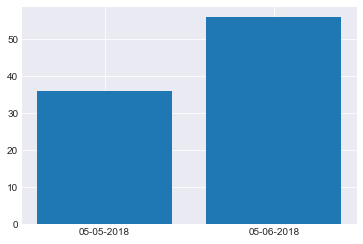

In [60]:
def lineplot(x_data,y_data,x_label="",y_label="",title=""):
    _,ax=plt.subplot(nrows=1)
    ax.plot(x_data,y_data,lw=2,color='#539caf',alpha=1)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    
x_data=["05-05-2018","05-06-2018"]
c.execute("select avg_count from avg_table where date_recv is ?",("05-05-2018",))
y_data=[]
y_data.append(c.fetchone()[0])
c.execute("select avg_count from avg_table where date_recv is ?",("05-06-2018",))
y_data.append(c.fetchone()[0])

print y_data,x_data
plt.style.use('seaborn-darkgrid')
y_pos = np.arange(len(x_data))
plt.bar(y_pos,y_data)
plt.xticks(y_pos,x_data)
plt.show()